In [1]:
from linkage_utils import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import matplotlib as mpl
from matplotlib import font_manager as fm
import os
import re


In [2]:
scores, mean_score = evaluate_submission()


  0%|          | 0/20 [00:00<?, ?it/s]

Score Break Down:
Curve 0: 124.422668
Curve 1: 123.772570
Curve 2: 113.766362
Curve 3: 139.402759
Curve 4: 119.907264
Curve 5: 116.824698
Curve 6: 124.649095
Curve 7: 149.131594
Curve 8: 150.407562
Curve 9: 114.655503
Curve 10: 144.248437
Curve 11: 136.811260
Curve 12: 143.198549
Curve 13: 130.191197
Curve 14: 116.374358
Curve 15: 111.248996
Curve 16: 152.377822
Curve 17: 113.123672
Curve 18: 136.876947
Curve 19: 139.051477
Overall Score: 130.022139


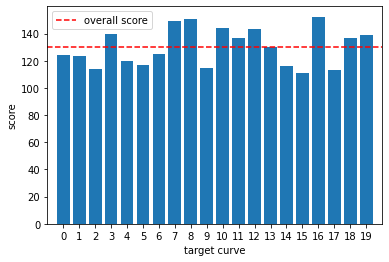

In [5]:
# Plotting the scores for each curve
curve_idx = range(20)
fig = plt.figure(figsize=(6, 4))
plt.bar(curve_idx, scores)
plt.plot(np.linspace(-1, 20, 100), mean_score * np.ones(100), 'r--', label="overall score")
plt.xticks(curve_idx)
plt.xlabel("target curve")
plt.ylabel("score")
plt.xlim([-1, 20])
plt.legend()
plt.savefig("scores.png", dpi=300)
plt.show()

  0%|          | 0/213 [00:00<?, ?it/s]

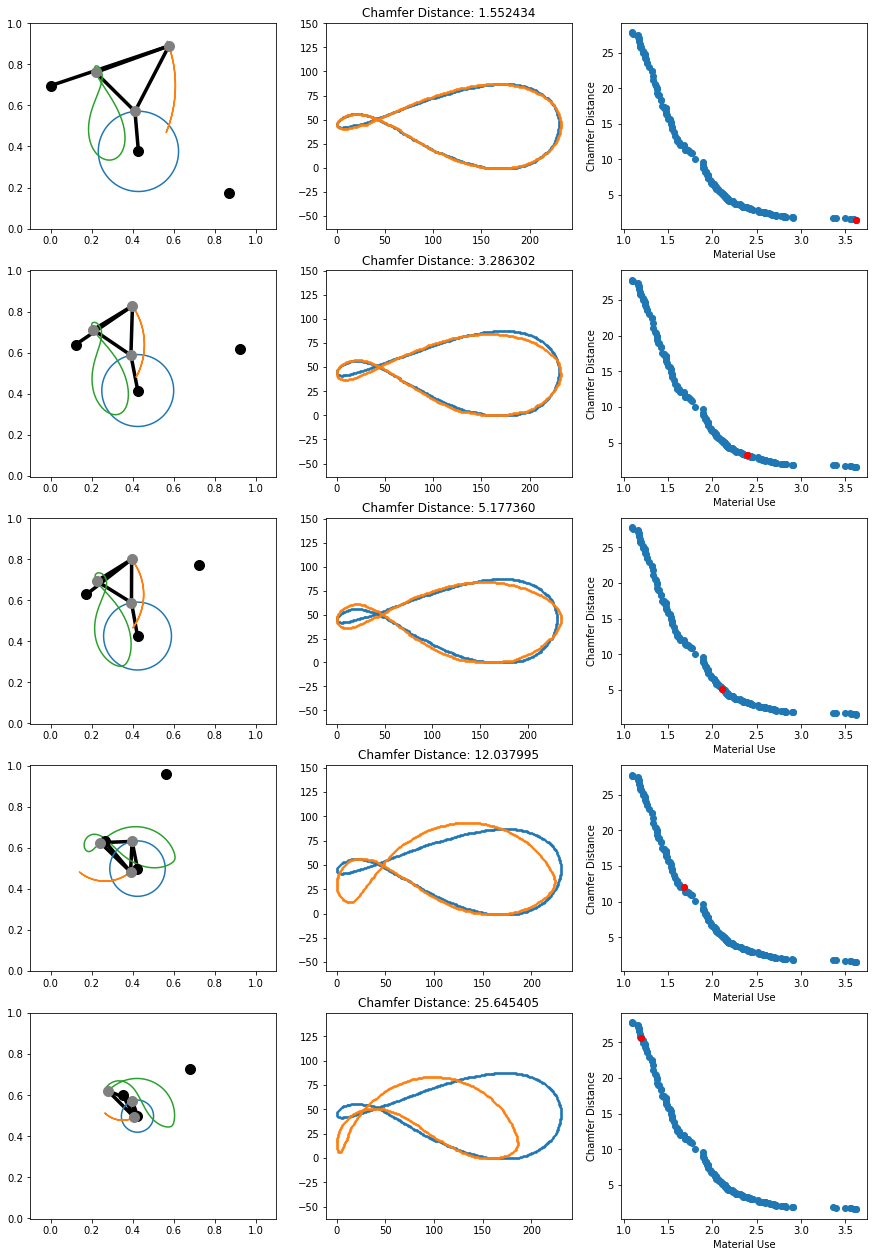

In [3]:
# Visualization of mechanism

target_curves = []

# Read every file separately and append to the list
for i in range(20):
    if not os.path.exists('./data/%i.csv'%(i)):
        raise IOError('Could not find %i.csv in the data folder'%(i))
    target_curves.append(np.loadtxt('./data/%i.csv'%(i),delimiter=','))
    

target_curve = target_curves[0]
solver = mechanism_solver()
# Get a solver normalizer
normalizer = curve_normalizer(scale=False)

for i in [0]:
    if os.path.exists('./results/%i.csv'%i):
            
        mechanisms = get_population_csv('./results/%i.csv'%i)
        F = []
    
        for m in mechanisms:
            C,x0,fixed_nodes,motor,target = from_1D_representation(m)

            # Solve
            x_sol,f1,f2 = solver.solve_rev(200,x0,C,motor,fixed_nodes,False)
                
                
            if not f1 and not f2:
                # Normalize
                x_norm = normalizer.get_oriented(x_sol[:,target,:])

                # Step 4: Rasterize
                out_pc = rasterized_curve_coords(x_norm,500)

                # Step 5: Compare
                cd = chamfer_distance(out_pc,target_curves[i],subsample=False)
                material = solver.material(x0,C)
                    
                if cd<=30 and material<=6.0:
                    F.append([cd,material])
                    

# Visualize Pareto Front
visualize_pareto_front_interval(np.array(mechanisms),np.array(F),target_curve)
plt.savefig("mechanism.png", dpi=600)